In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean

In [2]:
import dask.array as da

In [3]:
from matplotlib.gridspec import GridSpec

In [4]:
from matplotlib.patches import Rectangle

In [5]:
import matplotlib.cm as cm

In [6]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
from heat_plot_config import *

Iteration: 1, Target Distance: -2000.0000 km, Actual Distance: 2492.1677 km, Error: 492.1677 km
Iteration: 2, Target Distance: -2000.0000 km, Actual Distance: 1987.5814 km, Error: -12.4186 km
Iteration: 3, Target Distance: -2000.0000 km, Actual Distance: 2000.3384 km, Error: 0.3384 km
Iteration: 4, Target Distance: -2000.0000 km, Actual Distance: 1999.9908 km, Error: -0.0092 km
Iteration: 5, Target Distance: -2000.0000 km, Actual Distance: 2000.0003 km, Error: 0.0003 km
Iteration: 6, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: -0.0000 km
Iteration: 7, Target Distance: -2000.0000 km, Actual Distance: 2000.0000 km, Error: 0.0000 km
Rectangle Corners: [[-120.           39.5       ]
 [-102.5          22.5       ]
 [-116.59028114   10.55035943]
 [-134.09028114   29.23228783]]


In [8]:
from plot_config import *

In [9]:
def ld(file):
    return np.load('anom_ekman/'+file+'.npy')

In [10]:
yg = ld('goa_yg')
yy = ld('goa_y')
zz = ld('goa_z')
zl = ld('goa_zl')
gstrmm = ld('goa_stream_mean')
gstrma = ld('goa_stream_anom')
gtempm = ld('goa_temp_mean')
gtempa = ld('goa_temp_anom')

dist = ld('cc_dist')
cstrmm = ld('cc_stream_mean')
cstrma = ld('cc_stream_anom')
ctempm = ld('cc_theta_mean')
ctempa = ld('cc_theta_anom')

#No flux for surface t, to make things prettier
gtempm = np.roll(gtempm,1,axis = 0)
gtempm[0] = gtempm[1]
gtempa = np.roll(gtempa,1,axis = 0)
gtempa[0] = gtempa[1]

zz = np.roll(zz,1)
zz[0] = 5

In [11]:
tmax = 30
tmin = 5

In [12]:
# space = 0.28
# wspace = 0.15
# subnum_offset = -0.08
# small = 0.03
# vmax1 = 4
# vmax2 = 1.5

In [13]:
zlim = 20
gtitles = ['Climatology', 'Average of two years since 2013-10']
ctitles = ['Climatology', 'Average of two years since 2014-04']

In [14]:
# fig = plt.figure(figsize = (9,27/4))
# gs = GridSpec(2, 3, figure=fig,width_ratios = [1,1,small],wspace = wspace,hspace = space)
# norm1 = plt.Normalize(-vmax1,vmax1)
# norm2 = plt.Normalize(-vmax2,vmax2)

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1])
# ax2.set_yticks([])
# cax1 = fig.add_subplot(gs[0,-1])
# plt.colorbar(cm.ScalarMappable(norm=norm1, cmap=cmocean.cm.curl),cax = cax1,extend = 'both', label = r"$L_x\int_z^0 v dz'$ (Sv)")
# for i, ax in enumerate([ax1,ax2]):
#     data = [gstrmm,gstrma][i]
#     temp = [gtempm,gtempa][i]
#     ct = ax.contourf(yg,zl[:zlim],data[:zlim]/1e6,levels = 30,vmax = vmax1,vmin = -vmax1,cmap = cmocean.cm.curl)
#     ax.contour(y,zz[:zlim],temp[:zlim],levels = 25,cmap = cmocean.cm.thermal,vmin = tmin,vmax = 30)
#     ax.set_xlim(13,47)
#     ax.set_ylim(-200,0)
#     rect = Rectangle((32,-50),13,50,facecolor = 'grey',edgecolor = 'none',alpha = 0.5,zorder = 10)
#     ax.add_patch(rect)
#     ax.set_title(gtitles[i])
#     ax.set_xlabel('Latitude')
#     ax.set_title('('+chr(97+i)+')',loc = 'left',x = subnum_offset)
# ax1.set_ylabel('Depth (m)')

# ax3 = fig.add_subplot(gs[1,0])
# ax4 = fig.add_subplot(gs[1,1])
# ax4.set_yticks([])
# cax2 = fig.add_subplot(gs[1,-1])
# plt.colorbar(cm.ScalarMappable(norm=norm2, cmap=cmocean.cm.curl),cax = cax2,extend = 'both', label = r"$-L_y\int_x^0 w dx'$ (Sv)")
# for i, ax in enumerate([ax3,ax4]):
#     data = [cstrmm,cstrma][i]
#     temp = [ctempm,ctempa][i]
#     ct = ax.contourf(-dist,-np.arange(105)*2,-data,vmax = vmax2,vmin = -vmax2,cmap = cmocean.cm.curl,levels = 20)
#     tt = ax.contour(-(dist[1:]+dist[:-1])*0.5,-np.arange(105)*2,temp,levels = 15,
#                     cmap = cmocean.cm.thermal,vmin = tmin,vmax = 30)
#     masking = 260
#     rect = Rectangle((-masking,-200),masking,200,facecolor = 'grey',edgecolor = 'none',zorder = 10)
#     ax.add_patch(rect)
#     ax.set_xlim(-2000,0)
#     ax.set_ylim(-200,0)
#     ax.set_title(ctitles[i])
#     ax.set_xlabel('Distance (km)')
#     ax.set_title('('+chr(99+i)+')',loc = 'left',x = subnum_offset)
# ax3.set_ylabel('Depth (m)')
# plt.savefig('nc_fig4.pdf',format = 'pdf',dpi = 300)

In [15]:
# fig = plt.figure(figsize = (9,9))
# gs = GridSpec(3, 3, figure=fig,width_ratios = [1,1,small],height_ratios = [1,1,small],wspace = wspace,hspace = space)
# norm1 = plt.Normalize(-vmax1,vmax1)
# norm2 = plt.Normalize(-vmax2,vmax2)
# norm3 = plt.Normalize(tmin,tmax)

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1])
# ax2.set_yticks([])
# cax1 = fig.add_subplot(gs[0,-1])
# plt.colorbar(cm.ScalarMappable(norm=norm1, cmap=cmocean.cm.curl),cax = cax1,extend = 'both', label = r"$L_x\int_z^0 v dz'$ (Sv)")
# for i, ax in enumerate([ax1,ax2]):
#     data = [gstrmm,gstrma][i]
#     temp = [gtempm,gtempa][i]
#     ct = ax.contourf(yg,zl[:zlim],data[:zlim]/1e6,levels = 30,vmax = vmax1,vmin = -vmax1,cmap = cmocean.cm.curl)
#     ax.contour(yy,zz[:zlim],temp[:zlim],levels = 25,cmap = cmocean.cm.thermal,vmin = tmin,vmax = tmax)
#     ax.set_xlim(13,47)
#     ax.set_ylim(-200,0)
#     rect = Rectangle((32,-50),13,50,facecolor = 'grey',edgecolor = 'none',alpha = 0.5,zorder = 10)
#     ax.add_patch(rect)
#     ax.set_title(gtitles[i])
#     ax.set_xlabel('Latitude')
#     ax.set_title('('+chr(97+i)+')',loc = 'left',x = subnum_offset)
# ax1.set_ylabel('Depth (m)')

# ax3 = fig.add_subplot(gs[1,0])
# ax4 = fig.add_subplot(gs[1,1])
# ax4.set_yticks([])
# cax2 = fig.add_subplot(gs[1,-1])
# plt.colorbar(cm.ScalarMappable(norm=norm2, cmap=cmocean.cm.curl),cax = cax2,extend = 'both', label = r"$-L_y\int_x^0 w dx'$ (Sv)")
# for i, ax in enumerate([ax3,ax4]):
#     data = [cstrmm,cstrma][i]
#     temp = [ctempm,ctempa][i]
#     ct = ax.contourf(-dist,-np.arange(105)*2,-data,vmax = vmax2,vmin = -vmax2,cmap = cmocean.cm.curl,levels = 20)
#     tt = ax.contour(-(dist[1:]+dist[:-1])*0.5,-np.arange(105)*2,temp,levels = 15,
#                     cmap = cmocean.cm.thermal,vmin = tmin,vmax = tmax)
#     masking = 260
#     rect = Rectangle((-masking,-200),masking,200,facecolor = 'grey',edgecolor = 'none',zorder = 10)
#     ax.add_patch(rect)
#     ax.set_xlim(-2000,0)
#     ax.set_ylim(-200,0)
#     ax.set_title(ctitles[i])
#     ax.set_xlabel('Distance (km)')
#     ax.set_title('('+chr(99+i)+')',loc = 'left',x = subnum_offset)
# ax3.set_ylabel('Depth (m)')

# cax3 = fig.add_subplot(gs[2,:2])
# plt.colorbar(cm.ScalarMappable(norm=norm3, cmap=cmocean.cm.thermal),orientation = "horizontal",cax = cax3,extend = 'both', label = r"Temperature ($^\circ C$))")
# plt.savefig('nc_fig4.pdf',format = 'pdf',dpi = 300)

In [16]:
save_path = '/sciserver/filedb06-03/ocean/wenrui_temp/'
reg = xr.open_zarr(save_path+'eras5_cloud_wind.zarr')
sstm = xr.open_zarr(save_path+'eras5_sst.zarr')
wstrs = xr.open_zarr(save_path+'eras5_wstrs.zarr')

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [17]:
wstrs

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440, time: 312)
Coordinates:
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * time        (time) datetime64[ns] 1991-12-31T18:00:00 ... 2017-11-30T18:0...
    valid_time  (time) datetime64[ns] dask.array<chunksize=(312,), meta=np.ndarray>
Data variables:
    metss       (time, latitude, longitude) float32 dask.array<chunksize=(39, 91, 180), meta=np.ndarray>
    mntss       (time, latitude, longitude) float32 dask.array<chunksize=(39, 91, 180), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2025-04-14T15:44 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [18]:
x = np.array(reg.longitude)
y = np.array(reg.latitude)

In [19]:
f = np.sin(y/180*np.pi)*2*np.pi/86400

In [20]:
mask = np.isnan(np.array(sstm.sst))

In [21]:
slpm = reg.msl.mean(dim = 'time').persist()
um = reg.u10.mean(dim = 'time').persist()
vm = reg.v10.mean(dim = 'time').persist()
ustm = wstrs.metss.mean(dim = 'time').persist()
vstm = wstrs.mntss.mean(dim = 'time').persist()

In [22]:
# useas = reg.u10.groupby('time.month').mean(dim = 'time').persist()
# vseas = reg.v10.groupby('time.month').mean(dim = 'time').persist()

In [23]:
it1 = 12*(2014-1992)
it2 = 12*(2016-1992)
reg.time[it1].values,reg.time[it2].values,

(numpy.datetime64('2014-01-01T00:00:00.000000000'),
 numpy.datetime64('2016-01-01T00:00:00.000000000'))

In [24]:
it3 = 12*(2014-1992)-3
it4 = 12*(2016-1992)-3
reg.time[it3].values,reg.time[it4].values,

(numpy.datetime64('2013-10-01T00:00:00.000000000'),
 numpy.datetime64('2015-10-01T00:00:00.000000000'))

In [25]:
it5 = 12*(2014-1992)+3
it6 = 12*(2016-1992)+3
reg.time[it5].values,reg.time[it6].values,

(numpy.datetime64('2014-04-01T00:00:00.000000000'),
 numpy.datetime64('2016-04-01T00:00:00.000000000'))

In [26]:
slp = reg.msl.isel(time = slice(it1,it2)).mean(dim = 'time').persist()
u10 = reg.u10.isel(time = slice(it1,it2)).mean(dim = 'time').persist()
v10 = reg.v10.isel(time = slice(it1,it2)).mean(dim = 'time').persist()

In [27]:
slpa = slp - slpm
ua = np.array(u10-um)
va = np.array(v10-vm)

In [28]:
ugoa = reg.u10.isel(time = slice(it3,it4)).mean(dim = 'time')
ugoa = (ugoa-um).persist()

In [29]:
ustg = wstrs.metss.isel(time = slice(it3,it4)).mean(dim = 'time')
vstg = wstrs.mntss.isel(time = slice(it3,it4)).mean(dim = 'time')

In [30]:
eyag = -((np.array(ustg - ustm)/1029).T/f).T
exag =  ((np.array(vstg - vstm)/1029).T/f).T

/tmp/ipykernel_2309678/2316883213.py:1: RuntimeWarning: divide by zero encountered in divide
  eyag = -((np.array(ustg - ustm)/1029).T/f).T
/tmp/ipykernel_2309678/2316883213.py:2: RuntimeWarning: divide by zero encountered in divide
  exag =  ((np.array(vstg - vstm)/1029).T/f).T


In [31]:
def find_cs_sn(thetaA, phiA, thetaB, phiB):
    """Find a spherical angle OAB.

    theta is the angle
    between the meridian crossing point A
    and the geodesic connecting A and B.

    this function return cos and sin of theta
    """
    # O being north pole
    AO = np.pi / 2 - thetaA
    BO = np.pi / 2 - thetaB
    dphi = phiB - phiA
    # Spherical law of cosine on AOB
    cos_AB = np.cos(BO) * np.cos(AO) + np.sin(BO) * np.sin(AO) * np.cos(dphi)
    sin_AB = np.sqrt(1 - cos_AB**2)
    # spherical law of sine on triangle AOB
    SN = np.sin(BO) * np.sin(dphi) / sin_AB
    CS = np.sign(phiB - phiA) * np.sqrt(1 - SN**2)
    return CS, SN

cs,sn = find_cs_sn(np.radians(lon2),np.radians(lat2),np.radians(lon1),np.radians(lat1))

In [32]:
theta = np.abs(np.arctan2(sn,cs))
theta/np.pi*180

27.621188998684104

In [33]:
ucc = reg.u10.isel(time = slice(it5,it6)).mean(dim = 'time')
vcc = reg.v10.isel(time = slice(it5,it6)).mean(dim = 'time')
spd_cc = ucc*np.sin(theta)-vcc*np.cos(theta)
spd_ccm = um*np.sin(theta)-vm*np.cos(theta)
spda = (spd_cc - spd_ccm).persist()

In [34]:
ustcc = wstrs.metss.isel(time = slice(it5,it6)).mean(dim = 'time')
vstcc = wstrs.mntss.isel(time = slice(it5,it6)).mean(dim = 'time')

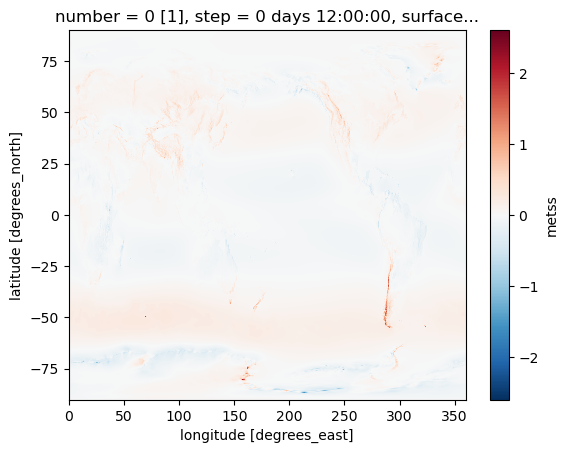

In [35]:
ustm.plot()

In [36]:
eyacc = -((np.array(ustcc - ustm)/1029).T/f).T
exacc =  ((np.array(vstcc - vstm)/1029).T/f).T

/tmp/ipykernel_2309678/4213189768.py:1: RuntimeWarning: divide by zero encountered in divide
  eyacc = -((np.array(ustcc - ustm)/1029).T/f).T
/tmp/ipykernel_2309678/4213189768.py:2: RuntimeWarning: divide by zero encountered in divide
  exacc =  ((np.array(vstcc - vstm)/1029).T/f).T


In [37]:
eyacc[mask] = np.nan
exacc[mask] = np.nan
eyacc[y<10] = np.nan
exacc[y<10] = np.nan

eyag[mask] = np.nan
exag[mask] = np.nan
eyag[y<10] = np.nan
exag[y<10] = np.nan

In [38]:
big_proj = ccrs.Mercator(central_longitude=180.0, 
                           min_latitude=-10.0, 
                           max_latitude=70.0,
                           latitude_true_scale=40.0)

In [39]:
xslc = slice(700,1150)
yslc = slice(80,400)

In [40]:
quick = slice(None,None,8)
sparce = slice(None,None,16)

In [41]:
mm = 1/25.4

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/cartopy/crs.py:538: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


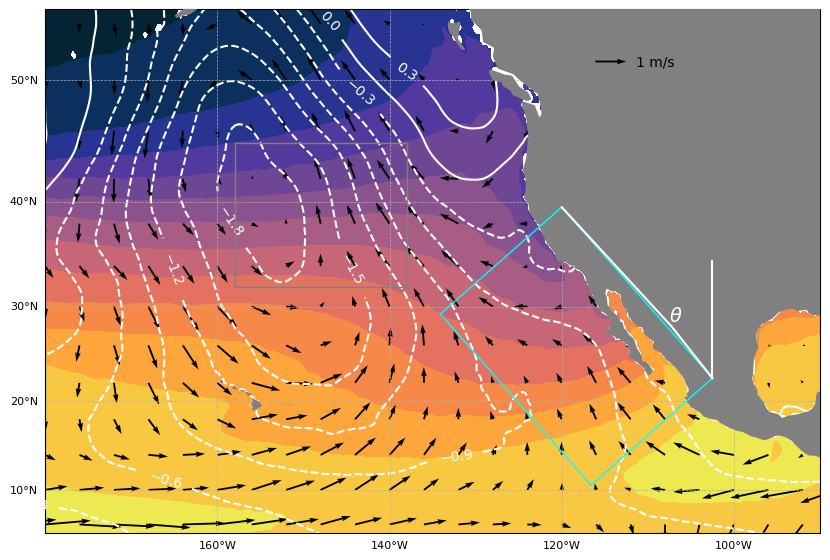

In [86]:
def pressure_subplot(ax):
    cs = ax.contour(x[xslc],y[yslc],slpa[yslc,xslc]/100,levels = np.linspace(-1.80,1.50,12),colors = 'w',transform = ccrs.PlateCarree())
    ax.clabel(cs)
    
    ax.contourf(x[xslc],y[yslc],sstm.sst[yslc,xslc]-273.15,levels = 15,transform = ccrs.PlateCarree(),vmax = tmax,vmin = tmin,
                        cmap = cmocean.cm.thermal)
    
    qv = plt.quiver(x[sparce],y[sparce],ua[sparce,sparce],va[sparce,sparce],transform = ccrs.PlateCarree(),scale = 25)
    
    ax.plot([-158,-158],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey',lw = 1)
    ax.plot([-138,-138],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey',lw = 1)
    ax.plot([-158,-138],[32,32],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey',lw = 1)
    ax.plot([-158,-138],[45,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey',lw = 1)
    
    ax.plot([lon1,lon2],[lat1,lat2],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan',lw = 1)
    ax.plot([lon2,lon3],[lat2,lat3],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan',lw = 1)
    ax.plot([lon3,lon4],[lat3,lat4],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan',lw = 1)
    ax.plot([lon4,lon1],[lat4,lat1],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan',lw = 1)
    
    ax.plot([lon1,lon2],[lat1,lat2],zorder = 10,transform = ccrs.Geodetic(),color = 'w')
    ax.plot([lon2,lon2],[lat2+12,lat2],zorder = 10,transform = ccrs.Geodetic(),color = 'w')
    ax.text(lon2-5,lat2+6,r'$\theta$',zorder = 10,transform = ccrs.Geodetic(),color = 'w',fontsize = 14)
    ax.add_feature(cfeature.LAND, zorder=8, facecolor='grey')
    
    qk = ax.quiverkey(qv,X=0.75, Y=0.9, U=1, label='1 m/s', labelpos='E', transform=ax.transAxes)
    qk.set_zorder(10)
    ax.set_extent([-180,-90,5,55],crs = ccrs.PlateCarree())
    
    gl = ax.gridlines(draw_labels = True,linestyle="--", linewidth=0.5)
    gl.top_labels = False
    gl.right_labels= False
    gl.xlabel_style = {'size':8}
    gl.ylabel_style = {'size':8}
# fig = plt.figure(figsize = (120*mm,90*mm))
fig = plt.figure(figsize = (10,8))
ax = plt.axes(projection = big_proj)
pressure_subplot(ax)

In [43]:
# x[750],x[950],y[120],y[280]
xslcg = slice(750,950)
yslcg = slice(120,280)
xsparceg = slice(750,950,8)
ysparceg = slice(120,280,8)

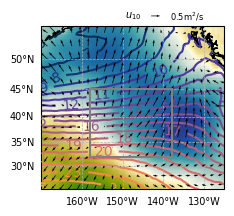

In [44]:
def goa_subplot(ax,fontsize = 7):
    vmax = 1.5
    ax.pcolormesh(x[xslcg],y[yslcg],ugoa[yslcg,xslcg],transform = ccrs.PlateCarree(),cmap = cmocean.cm.delta,vmax = vmax,vmin = -vmax)
    cs = ax.contour(x[xslcg],y[yslcg],sstm.sst[yslcg,xslcg]-273.15,levels = np.linspace(tmin,tmax,tmax-tmin+1),transform = ccrs.PlateCarree(),
                        cmap = cmocean.cm.thermal)
    ax.clabel(cs)
    
    qv = ax.quiver(x[xsparceg],y[ysparceg],exag[ysparceg,xsparceg],eyag[ysparceg,xsparceg],transform = ccrs.PlateCarree(),scale = 10,zorder = 8,color = 'k',width = 0.004)
    
    ax.plot([-158,-158],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
    ax.plot([-138,-138],[32,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
    ax.plot([-158,-138],[32,32],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
    ax.plot([-158,-138],[45,45],zorder = 10,transform = ccrs.PlateCarree(),color = 'grey')
    ax.coastlines()
    
    ax.set_extent([-170,-125,25,55],crs = ccrs.PlateCarree())
    ax.set_title(r'$u_{10}$',fontsize = fontsize)
    
    gl = ax.gridlines(draw_labels = True,linestyle="--", linewidth=0.5)
    gl.top_labels = False
    gl.right_labels= False
    gl.xlabel_style = {'size':fontsize}
    gl.ylabel_style = {'size':fontsize}
    
    qk = ax.quiverkey(qv,X=0.65, Y=1.06, U=0.5, label=r'$0.5 \mathrm{m^2/s}$',fontproperties= {'size':fontsize-1}, labelpos='E', transform=ax.transAxes)
    qk.set_zorder(10)
fig = plt.figure(figsize = (60*mm,60*mm))
ax = plt.axes(projection = big_proj)
goa_subplot(ax)

In [45]:
# x[850],x[1050],y[160],y[380]
xslcc = slice(850,1050)
yslcc = slice(160,380)
xsparcecc = slice(850,1050,8)
ysparcecc = slice(160,380,8)

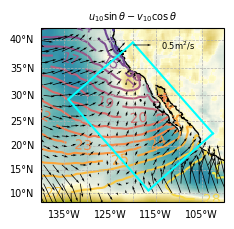

In [46]:
def cc_subplot(ax,fontsize = 7):
    vmax = 1.5
    ax.pcolormesh(x[xslcc],y[yslcc],spda[yslcc,xslcc],transform = ccrs.PlateCarree(),cmap = cmocean.cm.delta,vmax = vmax,vmin = -vmax)
    cs = ax.contour(x[xslcc],y[yslcc],sstm.sst[yslcc,xslcc]-273.15,levels = np.linspace(tmin,tmax,tmax-tmin+1),transform = ccrs.PlateCarree(),
                        cmap = cmocean.cm.thermal)
    ax.clabel(cs,)
    
    qv = ax.quiver(x[xsparcecc],y[ysparcecc],exacc[ysparcecc,xsparcecc],eyacc[ysparcecc,xsparcecc],
                   transform = ccrs.PlateCarree(),scale = 5,zorder = 8,color = 'k',width = 0.004)
    
    ax.plot([lon1,lon2],[lat1,lat2],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
    ax.plot([lon2,lon3],[lat2,lat3],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
    ax.plot([lon3,lon4],[lat3,lat4],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
    ax.plot([lon4,lon1],[lat4,lat1],zorder = 10,transform = ccrs.PlateCarree(),color = 'cyan')
    ax.coastlines()
    
    ax.set_extent([-140,-100,8,42],crs = ccrs.PlateCarree())
    ax.set_title(r'$u_{10}\sin \theta-v_{10}\cos\theta$',fontsize = fontsize)
    
    gl = ax.gridlines(draw_labels = True,linestyle="--", linewidth=0.5)
    gl.top_labels = False
    gl.right_labels= False
    gl.xlabel_style = {'size':fontsize}
    gl.ylabel_style = {'size':fontsize}
    
    qk = ax.quiverkey(qv,X=0.6, Y=0.9, U=0.5, label=r'$0.5 \mathrm{m^2/s}$', labelpos='E',fontproperties= {'size':fontsize-1}, transform=ax.transAxes)
    qk.set_zorder(10)
fig = plt.figure(figsize = (60*mm,60*mm))
ax = plt.axes(projection = big_proj)
cc_subplot(ax)

In [47]:
vmax1 = 4
vmax2 = 1.5
subnum_offset = -0.14

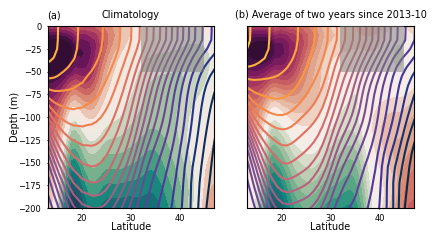

In [48]:
def goa_mer_plots(ax1,ax2,fontsize = 7):
    for i, ax in enumerate([ax1,ax2]):
        data = [gstrmm,gstrma][i]
        temp = [gtempm,gtempa][i]
        ct = ax.contourf(yg,zl[:zlim],data[:zlim]/1e6,levels = 30,vmax = vmax1,vmin = -vmax1,cmap = cmocean.cm.curl)
        ax.contour(yy,zz[:zlim],temp[:zlim],levels = 25,cmap = cmocean.cm.thermal,vmin = tmin,vmax = tmax)
        ax.set_xlim(13,47)
        ax.set_ylim(-200,0)
        rect = Rectangle((32,-50),13,50,facecolor = 'grey',edgecolor = 'none',alpha = 0.5,zorder = 10)
        ax.add_patch(rect)
        ax.set_xlabel('Latitude',fontsize = fontsize,labelpad = -1)
        ax.tick_params('both',length = 1,labelsize = fontsize-1)
        if i ==0:
            ax.set_title(gtitles[i],fontsize = fontsize)
            ax.set_title('('+chr(97+i)+')',loc = 'left',x = 0,fontsize = fontsize)
        else:
            ax.set_title('('+chr(97+i)+') '+gtitles[i],fontsize = fontsize)
    ax1.set_ylabel('Depth (m)',fontsize = fontsize,labelpad = -1)
    ax2.set_yticks([])
fig = plt.figure(figsize = (120*mm,60*mm))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
goa_mer_plots(ax1,ax2)

In [49]:
ecco = xr.open_zarr('/sciserver/oceanography/ECCO_v4r4/ecco_v4r4')

In [54]:
ekgoa1 = xr.open_dataset('Ekman_158W_138W_monthly_1992_2017_ECCO2V4r4.nc').rename({'month':'time'})
# ekgoa2 = xr.open_dataset('Ekman_155W_145W_monthly_1992_2017_ECCO2V4r4.nc')
the_data = ekgoa1.data
ek = xr.Dataset()
ek['time'] = ecco.time
ek['lat'] = ekgoa1.lat
ek['ek'] = xr.DataArray(the_data.values,dims = ('time','lat'))
ek_s = np.array(ek['ek'].groupby('time.month').mean(dim = 'time'))
# ek['ek_a'] = ek['ek'].groupby('time.month') - ek['ek_s']
# # ekgoa = ekgoa.rename_dims({'month':'time'})
# # ekgoa['time'] = ecco.time
# # ekgoa_s = da.array(ekgoa.data).reshape(26,12,-1).mean(axis = 0)
# # lat0 = 45# 45,39,32
# ilat1 = int(np.where(ekgoa1.lat == 32)[0][0])
# ilat2 = int(np.where(ekgoa1.lat == 45)[0][0])
ilat = int(np.where(ekgoa1.lat == 40)[0][0])
# goa_average_ek = float(ek.ek[:,ilat1:ilat2+1].mean())
study_period = slice(260,290)

In [55]:
new_time = []
for year in range(2013,2017):
    for month in range(1,13):
        new_time.append(np.datetime64(f'{year}-{month:02d}-01'))
new_time = np.array(new_time)[8:39]

In [56]:
num_days = np.diff(new_time).astype(float)

In [57]:
cumsum1415 = -np.insert(np.cumsum(ek.ek[study_period,ilat]*num_days),0,0)/365.25

In [58]:
mean_seas = np.concatenate([ek_s[8:,ilat],ek_s[:,ilat],ek_s[:,ilat],ek_s[:2,ilat]],axis = 0)
cumsum_clim = -np.insert(np.cumsum(mean_seas*num_days),0,0)/365.25
# cumsum_clim = -np.insert(np.cumsum((mean_seas+0.4)*num_days),0,0)*86400/1e3

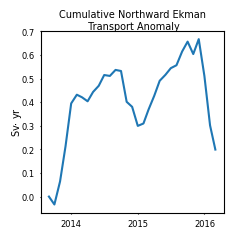

In [72]:
# ax.plot(new_time,cumsum1415,label = 'Anomalous northward transport')
# ax.plot(new_time,cumsum_clim,label = 'Anomalous northward transport')
def plt_goa_time_neo1(ax,fontsize = 7,pad = 1):
    ax.set_ylabel(r'Sv$\cdot$ yr',fontsize = fontsize,labelpad = -2)
    ax.set_title('Cumulative Northward Ekman\n Transport Anomaly',fontsize = fontsize,pad = pad)
    ax.set_xticks([np.datetime64(str(i)) for i in range(2014,2017)],[str(i) for i in range(2014,2017)])
    ax.tick_params('both',length = 1,labelsize = fontsize-1)
    ax.plot(new_time,cumsum_clim- cumsum1415,label = 'Anomaly')
    # ax.plot(new_time,cumsum1415,label = 'Northward transport')
    # ax.plot(new_time,cumsum_clim,label = 'Mean northward transport')
    # ax.legend(fontsize = 6,loc = 'lower center')
fig = plt.figure(figsize = (60*mm,60*mm))
ax = plt.axes()
plt_goa_time_neo1(ax)

In [62]:
# def plt_goa_time(ax,fontsize = 7):
#     rolled = ek.ek_a.rolling(time=6,center= True).mean()
#     # for ilat in range(ilat1,ilat2):
#     #     ax.plot(ek.time,ek.ek_a[:,ilat],color = 'b',alpha = 0.1)
#     ax.plot(ek.time,ek.ek_a[:,ilat],label = 'Anomalous northward transport')
#     # ax.plot(ek.time,ek.ek_a[:,ilat1:ilat2+1].mean(dim = 'lat'),label = r'Average transport from $32^\circ N$ to $45^\circ N$')
#     # ax.plot(ek.time,rolled[:,ilat1:ilat2+1].mean(dim = 'lat'),label = '6-month running mean')
#     ax.plot(ek.time,rolled[:,ilat],label = '6-month running mean')
#     ax.plot(ek.time,np.zeros(len(ek.time)),'k:')
#     ax.axvspan(np.datetime64('2013-10'),np.datetime64('2015-10'),color = 'grey',alpha = 0.3)
#     ax.set_xlim(np.datetime64('2011-01'),np.datetime64('2018-01'))
#     ax.text(np.datetime64('2012'),2.5,f'Average: {goa_average_ek:.2f} Sv',ha = 'left',fontsize = fontsize)
#     ax.set_ylim(-3,3)
#     ax.legend(fontsize = 6,loc = 'lower center')
#     ax.set_title('Northward Ekman Transport Anomaly',fontsize = fontsize)
#     # ax.tick_params('both',length = 1,labelsize = fontsize)
#     ax.set_ylabel('Sv',fontsize = fontsize,labelpad = -4)
#     ax.tick_params('both',length = 1,labelsize = fontsize-1)
#     # ax.set_ylim(-1,1)
# fig = plt.figure(figsize = (60*mm,60*mm))
# ax = plt.axes()
# plt_goa_time(ax)

In [63]:
ekcc1 = xr.open_dataset('Ekman_bigbox_Wenrui_monthly_1992_2017_ECCO2V4r4.nc',decode_times=False)
ekcc2 = xr.open_dataset('Ekman_smallbox_Wenrui_monthly_1992_2017_ECCO2V4r4.nc',decode_times=False)

ekc = xr.Dataset()
ekc['time'] = ecco.time
le_data = np.array(ekcc2['Tr_W'])
ekc['ek'] = xr.DataArray(le_data,dims = ('time'))
ek_scc = np.array(ekc['ek'].groupby('time.month').mean(dim = 'time'))
# ekc['ek_a'] = ekc['ek'].groupby('time.month') - ekc['ek_s']
# cc_average_ek = float(ekc.ek[:].mean())

cumsum1415cc = -np.insert(np.cumsum(ekc.ek[study_period]*num_days),0,0)/365.25
mean_seas = np.concatenate([ek_scc[8:],ek_scc[:],ek_scc[:],ek_scc[:2]],axis = 0)
cumsum_climcc = -np.insert(np.cumsum(mean_seas*num_days),0,0)/365.25

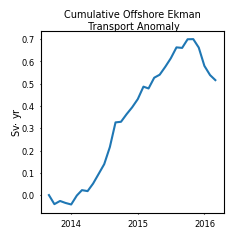

In [73]:
def plt_cc_time_neo1(ax,fontsize = 7,pad = 1):
    ax.set_ylabel(r'Sv$\cdot$ yr',fontsize = fontsize,labelpad = -2)
    ax.set_title('Cumulative Offshore Ekman\n Transport Anomaly',fontsize = fontsize,pad = pad)
    ax.set_xticks([np.datetime64(str(i)) for i in range(2014,2017)],[str(i) for i in range(2014,2017)])
    ax.tick_params('both',length = 1,labelsize = fontsize-1)
    ax.plot(new_time,cumsum_climcc- cumsum1415cc,label = 'Anomalous northward transport')
    # ax.plot(new_time,cumsum1415cc,label = 'Onshore transport')
    # ax.plot(new_time,cumsum_climcc,label = 'Mean onshore transport')
    # ax.legend(fontsize = 5,loc = 'lower center')
fig = plt.figure(figsize = (60*mm,60*mm))
ax = plt.axes()
plt_cc_time_neo1(ax)

In [65]:
# def plt_cc_time(ax,fontsize = 7):
#     rolled = ekc.ek_a.rolling(time = 6,center=True).mean()
#     ax.plot(ecco.time,ekc['ek_a'],label = 'Anomalous onshore transport')
#     ax.axvspan(np.datetime64('2014-04'),np.datetime64('2016-04'),color = 'cyan',alpha = 0.3)
#     ax.set_xlim(np.datetime64('2011-01'),np.datetime64('2018-01'))
#     ax.plot(ekc.time,rolled,label = '6-month running mean')
#     ax.plot(ekc.time,np.zeros(len(ek.time)),'k:')
#     ax.text(np.datetime64('2012'),1.5,f'Average: {cc_average_ek:.2f} Sv',ha = 'left',fontsize = fontsize)
#     ax.set_ylim(-2,2)
#     ax.legend(fontsize = 6,loc = 'lower center')
#     ax.set_title('Onshore Ekman Transport Anomaly',fontsize = fontsize)
#     ax.tick_params('both',length = 1,labelsize = fontsize-1)
#     ax.set_ylabel('Sv',fontsize = fontsize,labelpad = -4)
# fig = plt.figure(figsize = (60*mm,60*mm))
# ax = plt.axes()
# plt_cc_time(ax)

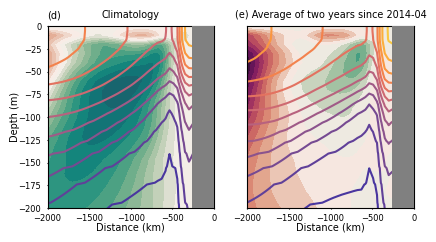

In [66]:
def cc_mer_plots(ax3,ax4,fontsize = 7):
    ax4.set_yticks([])
    for i, ax in enumerate([ax3,ax4]):
        data = [cstrmm,cstrma][i]
        temp = [ctempm,ctempa][i]
        ct = ax.contourf(-dist,-np.arange(105)*2,-data,vmax = vmax2,vmin = -vmax2,cmap = cmocean.cm.curl,levels = 20)
        tt = ax.contour(-(dist[1:]+dist[:-1])*0.5,-np.arange(105)*2,temp,levels = 15,
                        cmap = cmocean.cm.thermal,vmin = tmin,vmax = tmax)
        masking = 260
        rect = Rectangle((-masking,-200),masking,200,facecolor = 'grey',edgecolor = 'none',zorder = 10)
        ax.add_patch(rect)
        ax.set_xlim(-2000,0)
        ax.set_ylim(-200,0)
        ax.set_xlabel('Distance (km)',fontsize = fontsize,labelpad = -1)
        if i ==0:
            ax.set_title(ctitles[i],fontsize = fontsize)
            ax.set_title('('+chr(100+i)+')',loc = 'left',x = 0,fontsize = fontsize)
        else:
            ax.set_title('('+chr(100+i)+') '+ctitles[i],fontsize = fontsize)
        
        ax.tick_params('both',length = 1,labelsize = fontsize-1)
    ax3.set_ylabel('Depth (m)',fontsize = fontsize,labelpad = -1)
fig = plt.figure(figsize = (120*mm,60*mm))
ax3 = plt.subplot(1,2,1)
ax4 = plt.subplot(1,2,2)
cc_mer_plots(ax3,ax4)

In [77]:
space = 0.42
wspace = 0.15
# small = 0.03
fontsize = 7

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/cartopy/crs.py:538: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '
/tmp/ipykernel_2309678/3364652430.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


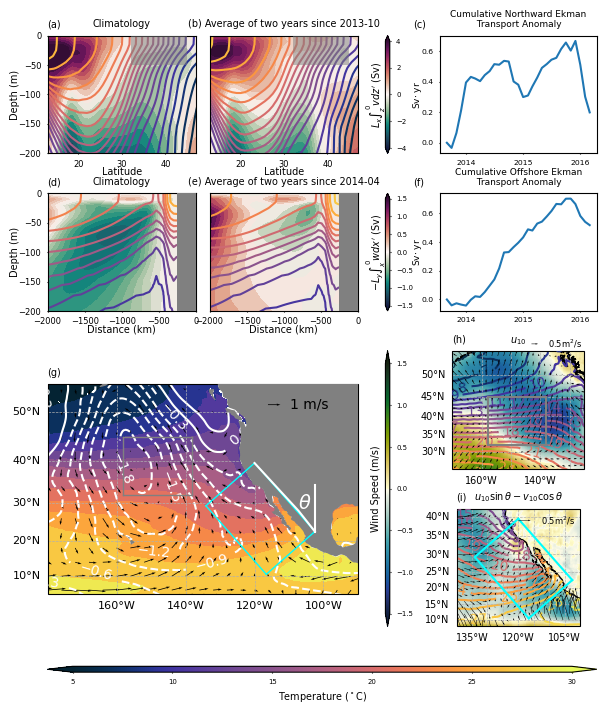

In [80]:
fig = plt.figure(figsize = (180*mm,210*mm))
gs = GridSpec(5, 6, figure=fig,width_ratios = [0.85,0.85,0.001,0.025,0.13,0.9],height_ratios = [1,1,1,1,0.05],wspace = wspace,hspace = space)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
goa_mer_plots(ax1,ax2)

ax25 = fig.add_subplot(gs[0,-1])
plt_goa_time_neo1(ax25,fontsize = 6.5)
ax25.set_title('(c)',loc = 'left',x = -0.17,fontsize = fontsize)

ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
cc_mer_plots(ax3,ax4)

ax35 = fig.add_subplot(gs[1,-1])
plt_cc_time_neo1(ax35,fontsize = 6.5)
ax35.set_title('(f)',loc = 'left',x = -0.17,fontsize = fontsize)

ax = fig.add_subplot(gs[2:4,:2],projection = big_proj)
pressure_subplot(ax)
ax.set_title('(g)',loc = 'left',fontsize = fontsize)

ax = fig.add_subplot(gs[2,-1],projection = big_proj)
goa_subplot(ax)
ax.set_title('(h)',loc = 'left',fontsize = fontsize)

ax = fig.add_subplot(gs[3,-1],projection = big_proj)
cc_subplot(ax)
ax.set_title('(i)',loc = 'left',fontsize = fontsize)

norm1 = plt.Normalize(-vmax1,vmax1)
norm2 = plt.Normalize(-vmax2,vmax2)
norm3 = plt.Normalize(tmin,tmax)
cax1 = fig.add_subplot(gs[0,3])
aspect = 50
cb1 = plt.colorbar(cm.ScalarMappable(norm=norm1, cmap=cmocean.cm.curl),cax = cax1,extend = 'both',aspect = aspect)
cb1.ax.set_ylabel(r"$L_x\int_z^0 v dz'$ (Sv)",labelpad = -30,fontsize = 7)
cb1.ax.tick_params('both',length = 1,labelsize = 5)
cax2 = fig.add_subplot(gs[1,3])
cb2 = plt.colorbar(cm.ScalarMappable(norm=norm2, cmap=cmocean.cm.curl),cax = cax2,extend = 'both',aspect = aspect)
cb2.ax.set_ylabel(r"$-L_y\int_x^0 w dx'$ (Sv)",labelpad = -35,fontsize = 7)
cb2.ax.tick_params('both',length = 1,labelsize = 5)
cax3 = fig.add_subplot(gs[2:4,3])
cb3 = plt.colorbar(cm.ScalarMappable(norm=norm2, cmap=cmocean.cm.delta),cax = cax3,extend = 'both',aspect = aspect*2)
cb3.ax.set_ylabel("Wind Speed (m/s)",labelpad = -30,fontsize = 7)
cb3.ax.tick_params('both',length = 1,labelsize = 5)

cax4 = fig.add_subplot(gs[-1,:])
cb4 = plt.colorbar(cm.ScalarMappable(norm=norm3, cmap=cmocean.cm.thermal),orientation = "horizontal",cax = cax4,extend = 'both')
cb4.ax.set_xlabel(r"Temperature ($^\circ \mathrm{C}$)",fontsize = 7)
cb4.ax.tick_params('both',length = 1,labelsize = 5)
plt.tight_layout()

plt.savefig('nc_fig4.pdf',format = 'pdf',dpi = 300)